In [215]:
import math
import graphviz
from graphviz import nohtml

class Value:
    def __init__(self, data: float, _children=(), _op:str=None, label=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._children = _children
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value({self.data}, {self.label})"

    def __add__(self, other):
        out = Value(data = self.data + other.data, _children = (self, other), _op = '+')
        def _backward ():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(data = self.data * other.data, _children = (self, other), _op = '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tan(self):
        tan_val = (math.exp(2 * self.data) - 1)/(math.exp(2 * self.data) +1)
        out = Value(data =  tan_val, _children=( self, ), _op='tan')
        def _backward():
            self.grad = 1 - tan_val**2
        out._backward = _backward
        return out

    def backward(self):
        self.grad = 1
        stack = [self]
        visited = set()
        while len(stack):
            cur = stack.pop()
            if cur not in visited:
                visited.add(cur)
                if cur._backward is not None:
                    cur._backward()
                if cur._children is not None:
                    stack+= cur._children


In [216]:

def draw_graph(parent: Value):
    f = graphviz.Digraph(node_attr={'shape': 'record', 'height': '.1'})
    stack = [parent];
    f.node(parent.label,nohtml(f'<f0> {parent.label} |<f1> Data: {parent.data}|<f2>Grad: {parent.grad}'))
    while len(stack)!=0:
        cur = stack.pop()
        if cur._op != None :
            f.node(cur.label+cur._op, cur._op,shape='oval')
            f.edge(cur.label+cur._op, cur.label)
        if cur._children is not None:
            for children in cur._children:
                f.node(children.label,nohtml(f'<f0> {children.label} |<f1> Data: {children.data}|<f2>Grad: {children.grad}'))
                if cur._op != None :
                    f.edge(children.label, cur.label+cur._op)
                stack.append(children)
    return f


In [217]:
# input
x1 = Value(data=2.0, label='x1')
x2 = Value(data=0.0, label='x2')
# weights
w1 = Value(data=-3.0, label='w1')
w2 = Value(data=1.0, label='w2')
#bias
b = Value(data=6.8814, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label='x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label='x1w1*x2w2 + b'
o = n.tan(); o.label='o'

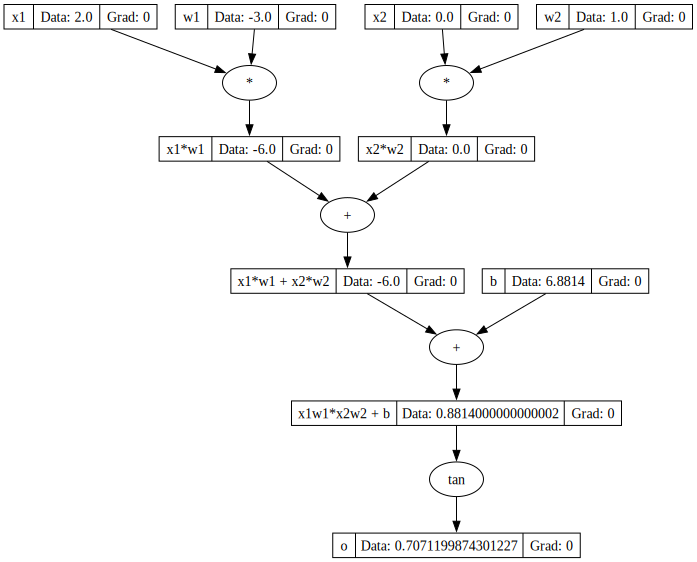

In [218]:
draw_graph(o)

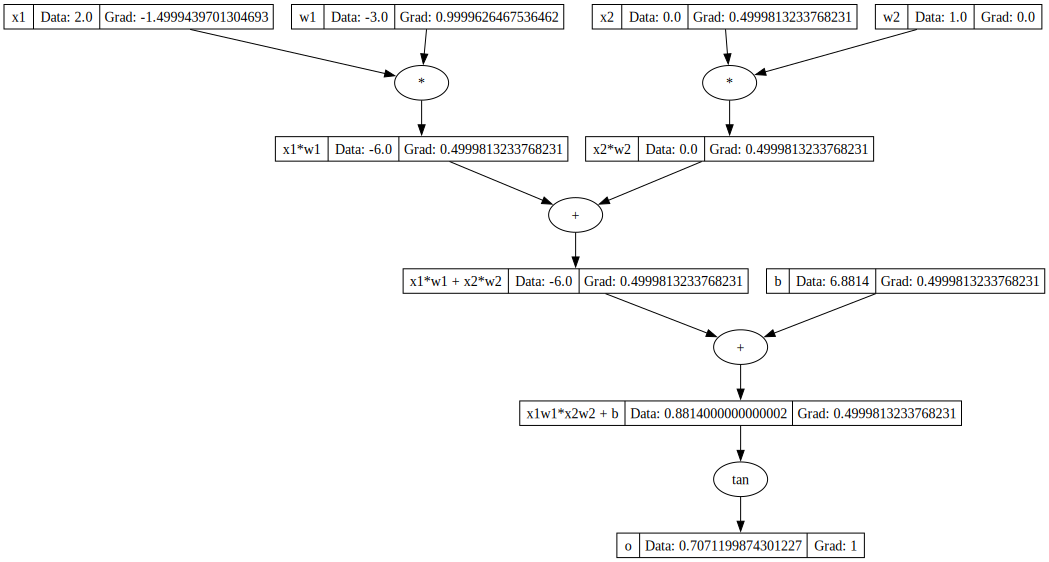

In [219]:
o.grad = 1
o.backward()
# o._backward()
# n._backward()
# x1w1_x2w2._backward()
# x2w2._backward()
# x1w1._backward()
draw_graph(o)